# CP213: Tutorial Notebook 2

## Question 1

The pressure drop $\Delta p$ of a fluid of density $\rho$ and
viscosity $\mu$ flowing at an mean velocity $v$ through a pipe of
diameter $D$ and length $L$ can be determined
through an equation relating the Reynolds number Re, which is defined as
\begin{align*}
{\rm Re} &= \frac{D\rho v}{\mu}
,
\end{align*}
and the friction factor $f$, which is defined as:
\begin{align*}
f &= \frac{\Delta p}{2 \rho v^2} \frac{D}{L}
.
\end{align*}

For ${\rm Re}>4000$, where the fluid flow is turbulent, the friction
factor and Reynolds number are related by the von K\'arm\'an-Nikuradse
equation
\begin{align*}
\frac{1}{\sqrt{f}} &= 4.0 \log_{10} ({\rm Re}\sqrt{f}) - 0.4
.
\end{align*}


1. What is the pressure drop for water (with density $1000\,{\rm
   kg\,m^{-3}}$ and viscosity $10^{-3}\,{\rm Pa\,s}$) flowing with a
   mean velocity of $3\,{\rm m\,s^{-1}}$ across a $1\,{\rm m}$ length
   of pipe with an inner diameter of $2\,{\rm cm}$?

2. Plot the friction factor (on the $y$-axis) against the Reynolds
   number (on the $x$-axis) from ${\rm Re}=4000$ to $100000$.  Use a
   log scale for both the $x$- and $y$-axes.
   
3. For the system described in part 1, plot the pressure drop as a
   function of the mean velocity up to $5\,{\rm m\,s}^{-1}$.  Make sure you only include values
   of the velocity where ${\rm Re}>4000$.


In [1]:
from scipy.optimize import fsolve
import numpy as np

rho = 1000.0
mu = 1.0e-3
v = 3.0
L = 1.0
D = 2.0e-2
Re = D*rho*v / mu

def res(f):
    return 1.0 / np.sqrt(f) - 4.0*np.log10(Re*np.sqrt(f)) + 0.4

f_sol = fsolve(res, 0.001)
print(Re, f_sol)

dp = 2*rho*v**2 * f_sol * L / D

print(f'Pressure drop is = {dp[0]} Pa')


60000.0 [0.00501995]
Pressure drop is = 4517.956384069742 Pa


Text(0, 0.5, 'Friction Factor ')

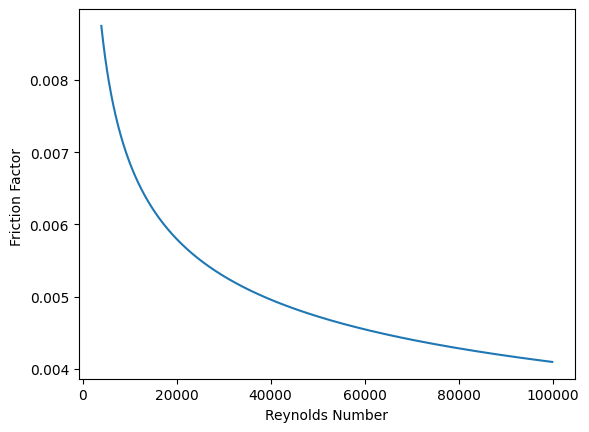

In [58]:
import matplotlib.pylab as plt

def res(f,Re):
    return 1.0 / np.sqrt(f) - 4.0*np.log10(Re*np.sqrt(f)) - 0.4

def func(Re):
    f_sol = fsolve(res, 0.001, args=(Re))
    return f_sol 


Re_data = np.arange(4000,100000,100)
f_data = [func(Re) for Re in Re_data]

plt.plot(Re_data, f_data)
plt.xlabel('Reynolds Number')
plt.ylabel('Friction Factor ')

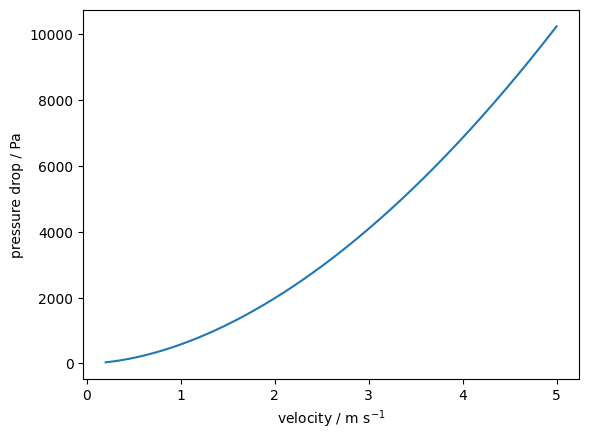

In [78]:
from scipy.optimize import fsolve
import numpy as np

def res(f, Re):
    return 1.0/np.sqrt(f) - 4.0*np.log10(Re* np.sqrt(f)) - 0.4

def func(Re):
    f_sol = fsolve(res, 0.001, args=(Re,))
    return f_sol

v_max = 5.0
D = 2.0e-2
L = 1.0
mu = 1.0e-3
rho = 1000.0

Re_min = 4000.0
v_min = Re_min*mu / (D*rho)


v_data = np.linspace(v_min, v_max, 1000)
Re_data = [D*rho*v/mu for v in v_data]
f_data = [func(Re) for Re in Re_data]
Dp_data = [2.0 * rho * v**2 * f * L/D for v, f in zip(v_data, f_data)]

plt.plot(v_data, Dp_data)
plt.xlabel(r'velocity / m s$^{-1}$')
plt.ylabel(r'pressure drop / Pa')
plt.show()

## Question 2


The ideal gas molar heat capacity can be represented by the Shomate
equation, which is given by
\begin{align*}
C_p(T)
&= A + B t + C t^2 + D t^3 + E t^{-2}
\end{align*}
where $t=T/1000$, $T$ is absolute temperature in kelvin, $C_p$ is
molar heat capacity in ${\rm J\,mol^{-1}\,K^{-1}}$, and $A$, $B$, $C$,
$D$, and $E$ are constants.

The parameters of the Shomate equation for nitrogen are given below
(taken from the [NIST
webbook](https://webbook.nist.gov/cgi/cbook.cgi?ID=C7727379&Type=JANAFG&Table=on#JANAFG)):


| Temperature / K | $100.$ - $500.$ | $500.$ - $2000.$ | $2000.$ - $6000.$ |
|:--- | ---:| ---:| ---:|
| $A$             |   $ 28.98641$ |    $ 19.50583$ |     $ 35.51872$ |
| $B$             |   $ 1.853978$ |    $ 19.88705$ |     $ 1.128728$ |
| $C$             |   $-9.647459$ |    $-8.598535$ |     $-0.196103$ |
| $D$             |   $ 16.63537$ |    $ 1.369784$ |     $ 0.014662$ |
| $E$             |   $ 0.000117$ |    $ 0.527601$ |     $-4.553760$ |


1. Create a function that takes the temperature as an argument and
   returns the corresponding value of the ideal gas molar heat
   capacity.  Plot the ideal gas molar heat capacity of nitrogen with
   temperature from $100$ to $6000\,{\rm K}$.

2. Using the relation:
\begin{align*}
H(T) &= H(T_0) + \int_{T_0}^T dT'\,C_p(T'),
\end{align*}
   where $H$ is the molar enthalpy, create a function that takes the
   temperature as an argument and returns the corresponding value of
   the ideal gas enthalpy.  Take the enthalpy at $T=298.15\,{\rm K}$
   to be equal to zero.  Plot the ideal gas enthalpy of nitrogen with
   temperature from $100$ to $6000\,{\rm K}$.
   

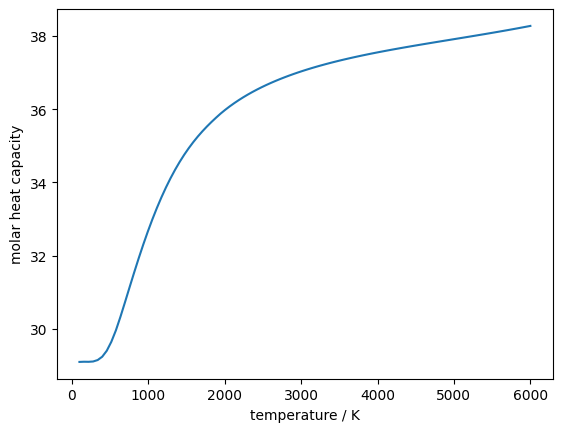

In [104]:
def cp(T):
    t = T/ 1000
    if T < 100:
        print('The temperature value is too small, miminum value is 100')
    elif (T >=100 and T < 500):
        return 28.98641 + 1.853978*t + -9.647459*t**2 + 16.63537*t**3 + 0.000117/ t**2
    elif (T >= 500 and T < 2000):
        return 19.50583 + 19.88705*t + -8.598535*t**2 + 1.369784*t**3 + 0.527601/ t**2
    elif (T >=2000 and T <=6000):
        return 35.51872 + 1.128728*t + -0.196103*t**2 + 0.014662*t**3 - 4.553760/ t**2
    else: print('The temperature value is too large, maximum value is 6000')

temp_data = np.linspace(100,6000,100)
cp_data = [cp(i) for i in temp_data]



plt.plot(temp_data, cp_data)
plt.xlabel('temperature / K')
plt.ylabel('molar heat capacity')
plt.show()



A*T + B*T**2/2000 + C*T**3/3000000 + D*T**4/4000000000 - 1000000*E/T

enthalpy at T=500 K: 5910.726873620032
enthalpy at T=2000 K: 56135.67087362003


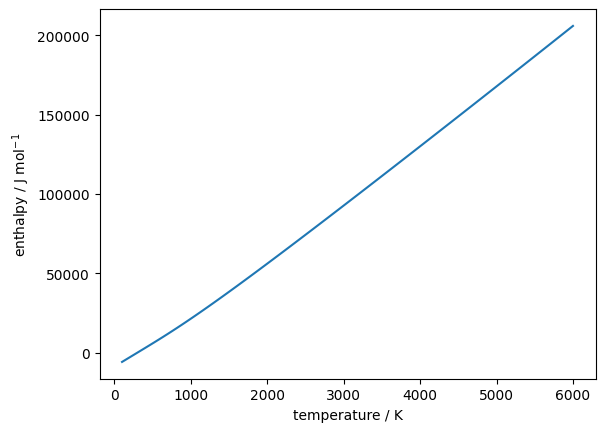

In [115]:
import sympy as sp

def get_coefficients(T):
    if (T>=100 and T<500):
        A =  28.98641
        B =  1.853978
        C = -9.647459
        D =  16.63537
        E =  0.000117
    elif (T>=500 and T<2000):        
        A =  19.50583
        B =  19.88705
        C = -8.598535
        D =  1.369784
        E =  0.527601
    elif (T>=2000 and T<=6000):        
        A =  35.51872
        B =  1.128728
        C = -0.196103
        D =  0.014662
        E = -4.553760
        
    return A, B, C, D, E

def get_Cp(T):    
    A, B, C, D, E = get_coefficients(T)
    t = T/1000.0
    Cp = A + B*t + C*t**2 + D*t**3 + E/t**2
    return Cp


T, A, B, C, D, E = sp.symbols('T A B  C  D  E')
t = T/1000
Cp = A + B*t + C*t**2 + D*t**3 + E/t**2

H = sp.integrate(Cp, T)
display(H)

A, B, C, D, E = get_coefficients(298.15)
T_end = 500
T_start = 298.15
H_500 = A*T_end - A*T_start + B*T_end**2/2000 - B*T_start**2/2000 + C*T_end**3/3000000 - C*T_start**3/3000000 + D*T_end**4/4000000000 - D*T_start**4/4000000000 + 1000000*E/T_start - 1000000*E/T_end
print(f'enthalpy at T=500 K: {H_500}')

A, B, C, D, E = get_coefficients(600)
T_end = 2000
T_start = 500
H_2000 = H_500 + A*T_end - A*T_start + B*T_end**2/2000 - B*T_start**2/2000 + C*T_end**3/3000000 - C*T_start**3/3000000 + D*T_end**4/4000000000 - D*T_start**4/4000000000 + 1000000*E/T_start - 1000000*E/T_end
print(f'enthalpy at T=2000 K: {H_2000}')

def get_start(T):
    if (T>=100 and T<500):
        T_start = 298.15
        H_start = 0.0
    elif (T>=500 and T<2000):  
        T_start = 500        
        H_start = H_500
    elif (T>=2000 and T<=6000):        
        T_start = 2000        
        H_start = H_2000
    return T_start, H_start

def get_H(T):
    A, B, C, D, E = get_coefficients(T)
    T_start, H_start = get_start(T)
    H = H_start
    H += A*T - A*T_start 
    H += B*T**2/2000 - B*T_start**2/2000 
    H += C*T**3/3000000 - C*T_start**3/3000000 
    H += D*T**4/4000000000 - D*T_start**4/4000000000 
    H += 1000000*E/T_start - 1000000*E/T
    return H

import numpy as np
import pylab as plt

T_data = np.linspace(100.0, 6000.0, 100)
H_data = [get_H(T) for T in T_data]
plt.plot(T_data, H_data)
plt.xlabel(r'temperature / K')
plt.ylabel(r'enthalpy / J mol$^{-1}$')
plt.show()
        


## Question 3

Evaluate the following integrals analytically (possibly with help from an integral table) and using sympy:

1. $\displaystyle
\int_a^b dx\, \varepsilon x    
$

2. $\displaystyle
\int_z^b dx\, (\gamma-\varepsilon x)
$

3. $\displaystyle   
\int_a^b dx\, \frac{\varepsilon}{x^2}
$

4. $\displaystyle   
\int_a^b dx\, \frac{\varepsilon+x}{x^2}
$

5. $\displaystyle   
\int_a^b dx\, \frac{\gamma-x}{(\varepsilon-x)^2}
$

6. $\displaystyle   
\int_1^4 dx\, x\, e^x \qquad 
$

1. $\displaystyle   
\int_0^1 dx\, 2^x \qquad 
$ 

In [109]:
import sympy as smp

x, gamma, epsilon, a, b, z = smp.symbols('x \gamma \epsilon a b z')

sol1 = smp.integrate(epsilon*x,(x,a,b))
sol2 = smp.integrate((gamma-x*epsilon), (x,z,b))
sol3 = smp.integrate(epsilon / x**2 , (x,a,b))
sol4 = smp.integrate((epsilon + x)/x**2, (x,a,b))
sol5 = smp.integrate((gamma-x)/(epsilon-x)**2, (x,a,b))
sol6 = smp.integrate(x*smp.exp(x), (x,1,4))
sol7 = smp.integrate(2**x, (x,0,1))

display(sol1, sol2, sol3, sol4,sol5,sol6,sol7)

-\epsilon*a**2/2 + \epsilon*b**2/2

-\epsilon*b**2/2 + \epsilon*z**2/2 + \gamma*b - \gamma*z

-\epsilon/b + \epsilon/a

-\epsilon/b + \epsilon/a - log(a) + log(b)

-(-\epsilon + \gamma)/(-\epsilon + b) + (-\epsilon + \gamma)/(-\epsilon + a) + log(-\epsilon + a) - log(-\epsilon + b)

3*exp(4)

1/log(2)

## Question 4

Consider the gas-water shift reaction
\begin{align*}
{\rm 
CO(g) + H_2O(g) \leftrightarrows CO_2(g) + H_2(g)
}
\end{align*}

| gas       | $M_w$        | $H_f$         | $G_f$         |
| :--       | --:        | --:           | --:           |
|           | g mol$^{-1}$ | kJ mol$^{-1}$ | kJ mol$^{-1}$ |
| CO(g)     | $28.01$    | $ -110.5$     | $ -137.2$     |
| CO$_2$(g) | $44.01$    | $ -393.3$     | $ -394.6$     |
| H$_2$(g)  | $ 2.02$    | $    0.0$     | $    0.0$     |
| H$_2$O(g) | $18.02$    | $ -241.8$     | $ -228.4$     |
|           |            |               |               |


The heat capacity of the gases can be described by the equation
\begin{align*}
\frac{C_p}{R}
&= a_0 + a_1 T + a_2 T^2 + a_3 T^3 + a_4 T^4
\end{align*}
where $T$ is the absolute temperature in kelvin,
$R=8.314$\,J$^{-1}$\,mol\,K$^{-1}$ is the ideal gas constant, and the
coefficients $a_k$ are given in the table below.


| gas       | $a_0$   | $a_1\times10^3$ | $a_2\times10^5$ | $a_3\times10^8$ | $a_4\times10^{11}$ |
| :--       | --:     | --:             | --:             | --:             | --:                |
|           |         | K$^{-1}$        | K$^{-2}$        | K$^{-3}$        |  K$^{-4}$                   |
| CO(g)     | $3.912$ | $ -3.913$| $1.182$  | $ -1.302$       | $  0.515$          |
| CO$_2$(g) | $3.259$ | $  1.356$| $1.502$  | $ -2.374$       | $  1.056$          |
| H$_2$(g)  | $2.883$ | $  3.681$| $-0.772$ | $  0.692$       | $ -0.213$          |
| H$_2$O(g) | $4.395$ | $ -4.186$| $1.405$ | $ -1.564$       | $  0.632$          |


The information in both tables have been summarized in the dictionary `data`.  The stoichiometric coefficients (the stoichiometric coefficient for species $k$ is typically denoted by the symbol $\nu_k$) of the reaction are held in the dictionary `nu`.  Note that product species have a positive stoichiometric coefficient, and reactant species have a negative stoichiometric coefficient.

In what follows below, assume that the mixtures behave as an ideal gas.



In [111]:
R = 8.314e-3  # ideal gas constant / kJ mol^{-1} K^{-1}
T0 = 298.15   # reference temperature / K
p0 = 1.0e5    # reference pressure / Pa


data = {}
data['CO']  = {'Mw':28.01, 'Hf':-110.5, 'Gf':-137.2 }
data['CO2'] = {'Mw':44.01, 'Hf':-393.3, 'Gf':-394.6 }
data['H2']  = {'Mw': 2.02, 'Hf':   0.0, 'Gf':   0.0 }
data['H2O'] = {'Mw':18.02, 'Hf':-241.8, 'Gf':-228.4 }

data['CO'] ['Cp_coeff'] = [3.912, -3.913e-3,  1.182e-5, -1.302e-8,  0.515e-11]      
data['CO2']['Cp_coeff'] = [3.259,  1.356e-3,  1.502e-5, -2.374e-8,  1.056e-11]      
data['H2'] ['Cp_coeff'] = [2.883,  3.681e-3, -0.772e-5,  0.692e-8, -0.213e-11]      
data['H2O']['Cp_coeff'] = [4.395, -4.186e-3,  1.405e-5, -1.564e-8,  0.632e-11]

nu = {}
nu['CO']  = -1.0
nu['CO2'] =  1.0 
nu['H2']  =  1.0
nu['H2O'] = -1.0



### Part 1: Enthalpy

The enthalpy can be determined from the heat capacity:
\begin{align*}
H(T) &= H_f + \int_{T_0}^{T} dT' C_p(T')
\end{align*}

**Task:** Using the empirical form of the heat capacity that was provided above, create a function that takes the temperature and component mole numbers as input and returns the total enthalpy of the mixture.

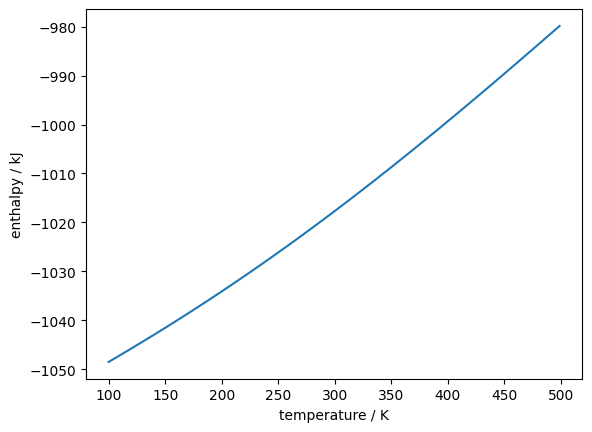

In [112]:
import numpy as np
T_data = np.arange(100.0, 500.0)


moles = {'CO':1, 'CO2':2, 'H2O':0.5, 'H2':0.9}


def get_H(T, moles):
    H = 0.0
    for molecule, coeff in nu.items():
        Nk = moles[molecule]
        Hf = data[molecule]['Hf']  # H_f is in kJ mol^{-1}
        a_list = data[molecule]['Cp_coeff']
        Hk = Hf
        for n in range(len(a_list)):
            Hk += R*a_list[n]*(T**(n+1)-T0**(n+1))
        H += Nk*Hk
    return H

H_data = [get_H(T, moles) for T in T_data]


import pylab as plt

plt.plot(T_data, H_data)
plt.ylabel(r'enthalpy / kJ')
plt.xlabel(r'temperature / K')

plt.show()

### Part 2: Enthalpy of reaction

The enthalpy of reaction is given by
\begin{align*}
\Delta H_{\rm rxn}(T)
&= \sum_k \nu_k H_{f,k}(T)
.
\end{align*}


**Task:** Plot the enthalpy of reaction for the gas-water shift reaction as a function of temperature.

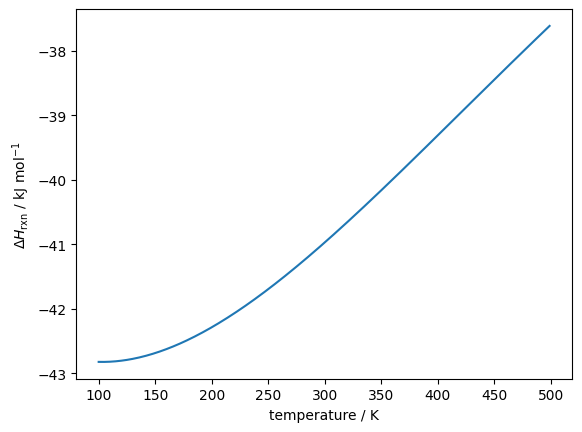

In [113]:
import numpy as np
T_data = np.arange(100.0, 500.0)

H_data = [get_H(T, nu) for T in T_data]

import pylab as plt

plt.plot(T_data, H_data)
plt.ylabel(r'$\Delta H_{\rm rxn}$ / kJ mol$^{-1}$')
plt.xlabel(r'temperature / K')

plt.show()